In [10]:
import pandas as pd
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
# directory - only train for now
train_dir = Path('train')

# initialise list to store processed data
processed_data = []

# consider each file in train folder
for folder in train_dir.iterdir():
    if folder.is_dir():

        # get data
        data = pd.read_csv(folder / 'train_data.csv')
        # append
        processed_data.append(data)

# concatenate all data   
data = pd.concat(processed_data, ignore_index=True)

# drop start and end columns and save as pandas dataframe
processed_df = pd.DataFrame(data)
processed_df.drop(['start', 'end', 'location' ], axis=1, inplace=True)

processed_df

,x_mean,y_mean,z_mean,location_idx,2d_movement_mean_x,2d_movement_mean_y,2d_movement_std_x,2d_movement_std_y,3d_movement_mean_x,3d_movement_mean_y,...,2d_shape_mean_height,2d_shape_std_width,2d_shape_std_height,3d_shape_mean_width,3d_shape_mean_height,3d_shape_mean_depth,3d_shape_std_width,3d_shape_std_height,room,label
0,0.967,-0.451,0.026,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,a_walk
1,0.377,-0.409,0.759,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,a_walk
2,0.681,-0.360,0.567,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,a_walk
3,0.857,-0.446,0.259,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,p_stand
4,0.678,-0.625,0.254,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,p_stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16118,-0.869,0.364,0.114,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,p_stand
16119,-0.871,0.362,0.111,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,p_stand
16120,-0.867,0.359,0.113,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,p_stand
16121,-0.871,0.358,0.104,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,p_stand


In [20]:
room_mapping = {room: i+1 for i, room in enumerate(processed_df['room'].unique())}
processed_df['room'] = processed_df['room'].map(room_mapping)

In [15]:
processed_df.isna().sum() # no NaN is good


x_mean                  0
y_mean                  0
z_mean                  0
location_idx            0
2d_movement_mean_x      0
2d_movement_mean_y      0
2d_movement_std_x       0
2d_movement_std_y       0
3d_movement_mean_x      0
3d_movement_mean_y      0
3d_movement_mean_z      0
3d_movement_std_x       0
3d_movement_std_y       0
3d_movement_std_z       0
2d_shape_mean_width     0
2d_shape_mean_height    0
2d_shape_std_width      0
2d_shape_std_height     0
3d_shape_mean_width     0
3d_shape_mean_height    0
3d_shape_mean_depth     0
3d_shape_std_width      0
3d_shape_std_height     0
room                    0
label                   0
dtype: int64

In [21]:
# prep X and Y from datset
X = processed_df.drop('label', axis=1)
y = processed_df['label']

# split it as you wish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train # choose model
clf = RandomForestClassifier(random_state=42)
#clf = SVC(kernel='linear', random_state=42)
#clf = KNeighborsClassifier(n_neighbors=3)
# clf = GradientBoostingClassifier(random_state=42)
#clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6855


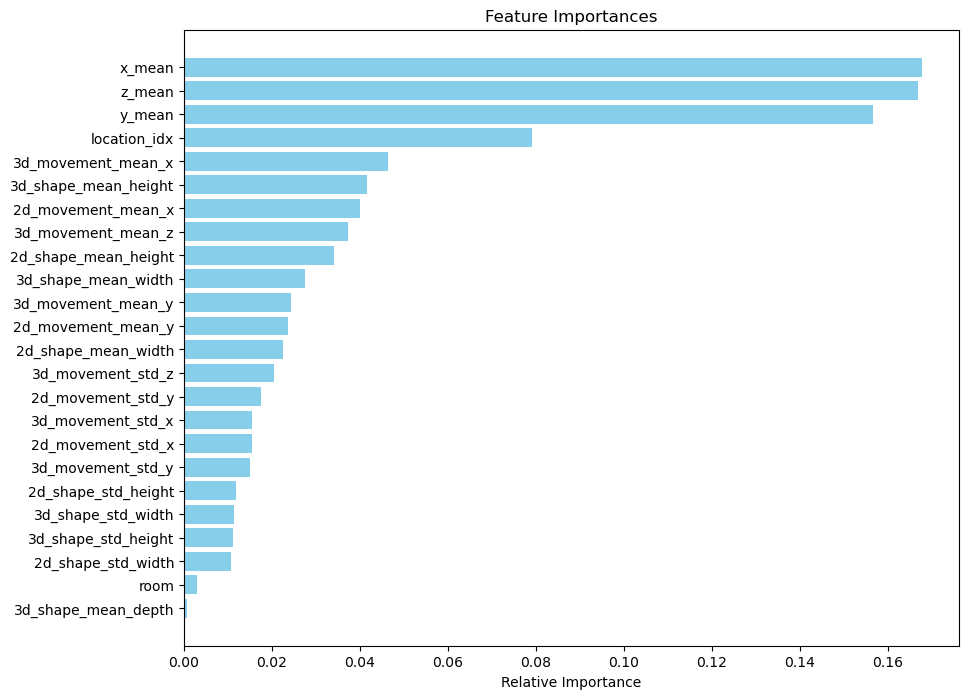

In [22]:
# Feature Engineering - method 1 - does not work with SVM

# get feature importances - from built in command
importances = clf.feature_importances_

# convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# sort the DataFrame to find out the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()
